In [1]:
# Проверим нашу рабочую директорию
import os

dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /home/tim
Directory name is : tim


In [2]:
# При необходимости, поменяем на новую рабочую директорию.
os.chdir('/home/tim/02_ML')

In [3]:
# Загрузим txt файл с помощью Pandas. В файле всего две колонки без заголовка. Присвоим колонкам имена. 
import pandas as pd
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
# Посмотрим на первые 6 строк (включая заголовок)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
# получим сводную информацию по всей таблице 
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


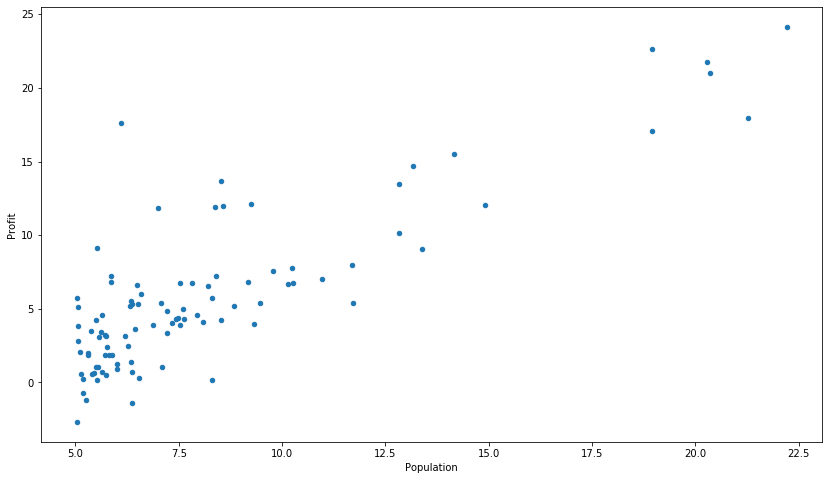

In [7]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(14,8))

# Cost function

In [8]:
# добавим фиктивную размерность x_0 = 1 для каждого наблюдения
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
# пусть Х - датафрейм наблюдений и признаков (включая фиктивную единичную колонку слева);
# пусть y - объясняемая (или целевая) переменная;
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head(), y.head()

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598,     Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233)

In [10]:
# преобразование Х и y (датафреймов) в матрицы;
import numpy as np
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape

((97, 2), (97, 1))

In [11]:
# в задаче первоначальный параметр для theta_0 и theta_1 равен нулю;
theta = np.matrix(np.array([0,0]))
theta, theta.shape

(matrix([[0, 0]]), (1, 2))

In [12]:
# функция потерь (cost function)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [13]:
# ответ на первое задание
computeCost(X, y, theta)

32.072733877455676

# Gradient Descent

In [14]:
# шаг метода Градиентный спуск = 0.01; количество циклов = 1000
alpha = 0.01
iters = 2000


In [15]:
# шаг метода Градиентный спуск = 0.01; количество циклов = 1000
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) # начальные нулевые значения
    parameters = int(theta.ravel().shape[1])# количество колонок у theta. В данном примере их всего две.
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta) # сохраняет значение Cost function для каждого цикла
        
   
    return theta, cost


___[Получаем две переменных из функции gradientDescent](https://stackoverflow.com/questions/20389533/what-does-x-y-mean-in-python-syntax)___. g - итоговые параметры для $\theta_0$ и $\theta_1$.

___[Unpacking a Tuple in Python](https://www.geeksforgeeks.org/unpacking-a-tuple-in-python)___


In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)


In [17]:
g

matrix([[-3.78806857,  1.18221277]])

In [18]:
computeCost(X, y, g)

4.4780276098799705

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

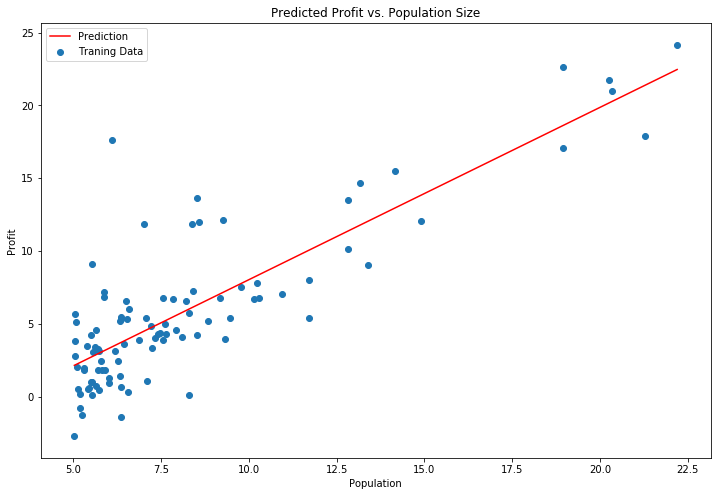

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')



Text(0.5, 1.0, 'Error vs. Training Epoch')

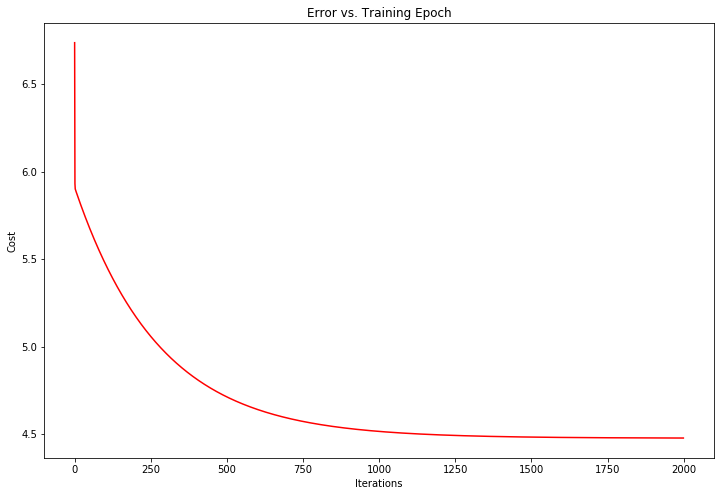

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

